In [1]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from keras import backend

# 1. DataLoader
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

print(X_train.shape[:])

# 입력 데이터 전처리 하기
H, W = X_train.shape[1:]

# 입력 데이터가 2차원일때 전처리 과정중 채널 정보를 확인하는 과정이 중요하다
# 흑백은 채널정보가 따로 없지만 그래도 1 이라는 값을 추가해줘야 한다.
# 컬러는 채널정보가 3으로 존재한다

# 또한 채널은 다른 정보의 앞에올수도 / 뒤에 붙을수도 있다
# backend 모듈 사용한다.

channel = backend.image_data_format()
channel

if backend.image_data_format == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0], 1, H, W) # X_train[0] 대신에 -1써도 동일한 표현
  X_test = X_test.reshape(X_test.shape[0],1,H,W)
  input_shape = (1,H,W) # 채널이 앞으로 간다
else:
  X_train = X_train.reshape(X_train.shape[0], H, W, 1) # X_train[0] 대신에 -1써도 동일한 표현
  X_test = X_test.reshape(X_test.shape[0],H,W, 1)
  input_shape = (H,W,1) # 채널이 뒤로 간다

# 전처리 2)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# 전처리 3)
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

## 3. 모델 생성하기
model = keras.models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# 위에서 나온 2차원 이미지 값들을 1차원으로 펼쳐서 FCN을 만든다
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# compile
model.compile('rmsprop', 'categorical_crossentropy', 'accuracy')

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'])

def plot_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'])

# fit... 학습할때 나오는 로그메세지들을 다 모아서 리턴한다...history
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 128, validation_split = 0.2)
score = model.evaluate(X_test, Y_test)

print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])



11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
Epoch 1/20
375/375 [==============================] - 37s 20ms/step - loss: 0.2287 - accuracy: 0.9356 - val_loss: 1.2399 - val_accuracy: 0.9444
Epoch 2/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0860 - accuracy: 0.9763 - val_loss: 0.0660 - val_accuracy: 0.9821
Epoch 3/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0721 - accuracy: 0.9804 - val_loss: 0.0522 - val_accuracy: 0.9852
Epoch 4/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0660 - accuracy: 0.9825 - val_loss: 0.0431 - val_accuracy: 0.9868
Epoch 5/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0577 - accuracy: 0.9847 - val_loss: 0.0706 - val_accuracy: 0.9879
Epoch 6/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0562 - accuracy: 0.9849 - val_loss: 0.0867 - val_accuracy: 0.9868
Epoch 7/20
375/375 [==============================] - 7s 19m

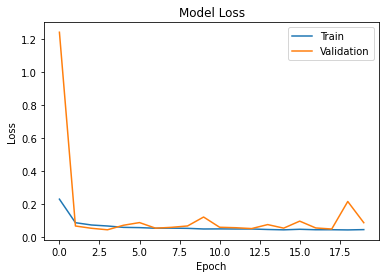

In [2]:
plot_loss(history)



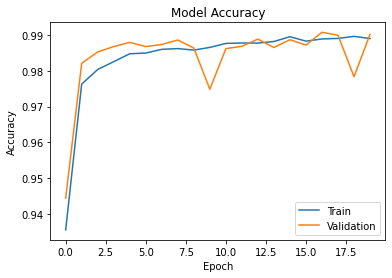

In [3]:
plot_acc(history)